In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('fr_sp_orders_q1_full_last_version.dsv', sep=';', low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307216 entries, 0 to 1307215
Data columns (total 38 columns):
SCM_N_ORDER_POS_NR              1307216 non-null int64
SCM_N_ORDER_NR                  1307216 non-null int64
TDT_T_KEY_ORDER_DATE            1307216 non-null object
THR_C_KEY_ORDER_HOUR            1307216 non-null object
SIT_N_KEY_SITE                  1307216 non-null int64
CUS_N_KEY_CUSTOMER              1307216 non-null int64
SCM_SALES_BMF                   1307216 non-null object
SCM_SALES_CANCEL_BMF            1307216 non-null object
SCM_D_FINANCE_CM1               1307216 non-null object
SCM_D_FINANCE_CM2               1307216 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    1307216 non-null object
SCM_AP_ID                       1307216 non-null int64
SCM_AS_ID                       1307216 non-null int64
SCM_MASTER_AP_ID                1307216 non-null int64
SCM_IS_ZSP_ORDER                1307216 non-null int64
SCM_C_ORDER_STATUS              1307216 non-null object

In [5]:
data.head()

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE,ORF_EXT_O_ID,ORF_EXT_K_ID,ORF_EXT_ROOT_K_ID,OP_AS_ID,OP_BONUSPOINTS,BP_TYP
0,433519945,101615411,02/01/18,10:06,4,1790664,"5,99",0,"2,9917","2,2581",...,04/01/18,52,3,"5,9",101615411,1790664,1790664,2025189,0,B
1,433519946,101615411,02/01/18,10:06,4,1790664,"-1,56",0,"-1,3","-1,3",...,04/01/18,52,3,"5,9",101615411,1790664,1790664,6,0,B
2,433519942,101615411,02/01/18,10:06,4,1790664,0,0,"-0,46","-0,812",...,04/01/18,52,3,"5,9",101615411,1790664,1790664,1556400,90,B
3,433519943,101615411,02/01/18,10:06,4,1790664,"39,99",0,"11,955","4,4835",...,04/01/18,52,3,"5,9",101615411,1790664,1790664,340161,0,B
4,433519944,101615411,02/01/18,10:06,4,1790664,"5,99",0,"3,0617","2,7392",...,04/01/18,52,3,"5,9",101615411,1790664,1790664,459956,0,B


In [6]:
data['ORDER_DATETIME'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'] + ' ' + data['THR_C_KEY_ORDER_HOUR'] + ':00', 
                                        format="%d/%m/%y %H:%M:%S")

In [7]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [8]:
data['CZP_START_DATE'] = pd.to_datetime(data['CZP_START_DATE'], format="%d/%m/%y")
data['CZP_EXPIRY_DATE'] = pd.to_datetime(data['CZP_EXPIRY_DATE'], format="%d/%m/%y")

In [9]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [10]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [11]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [12]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [13]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [14]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [15]:
lista4 = [float(str(i).replace(',','.')) for i in data['CZP_PRICE'].values]
data['CZP_PRICE'] = lista4

In [16]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [17]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [18]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

In [19]:
len(data), len(data['SCM_N_ORDER_NR'].unique())

(1307216, 270084)

In [20]:
#CHECK DUPLICATED ROWS

In [21]:
dupl_mask = [len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [22]:
len(dupl_mask), sum(dupl_mask)

(270084, 1323)

In [23]:
dup_orders = data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

In [24]:
dup_orders[:10]

array([101595009, 101715590, 101738787, 101804381, 101813430, 101926891,
       101935398, 101982040, 102064333, 102216647], dtype=int64)

In [25]:
len(dup_orders)

1323

In [26]:
len(data[data['SCM_N_ORDER_NR'].isin(dup_orders)])

15800

In [27]:
cust_2_dup_orders = data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique()[\
data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique() > 1].index.values

In [28]:
cust_2_dup_orders

array([2555051, 5410982, 9223630], dtype=int64)

In [29]:
data[(data['CUS_N_KEY_CUSTOMER'].isin(cust_2_dup_orders)) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]['SCM_N_ORDER_NR'].unique()

array([106888191, 106888990, 106940573, 106941403, 107495836, 107495474],
      dtype=int64)

In [30]:
#Let's get incorrect duplicated indexes instead of order_id to exclude them and select the correct data subset
dup_indexes = []

for i in dup_orders:
    o_id = data[data['SCM_N_ORDER_NR'] == i]
    if o_id['CUS_N_KEY_CUSTOMER'].unique() not in cust_2_dup_orders:
        sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
        min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [31]:
len(dup_indexes)

1317

In [32]:
for c in cust_2_dup_orders:
    #print('Customer', c)
    cust_orders = data[(data['CUS_N_KEY_CUSTOMER'] == c) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]
    if cust_orders['SCM_IS_ZSP_ORDER'].sum() >= 1:
        #print('SP Sold')
        sp_datetime = cust_orders[cust_orders['SCM_MASTER_AP_ID'] == 42225]['ORDER_DATETIME'].unique()[0]
        if (o_id['ORDER_DATETIME'] < sp_datetime).sum() > 0:
            #print('One order before SP')
            before = cust_orders[cust_orders['ORDER_DATETIME'] < sp_datetime]
            sp_dates_b = before['CZP_START_DATE'].value_counts().index.values
            max_date_b = before[before['CZP_START_DATE'] > min(sp_dates)]
            max_dates_b = list(max_date_b.index.values)
            
            after = o_id[o_id['ORDER_DATETIME'] >= sp_datetime]
            sp_dates_a = after['CZP_START_DATE'].value_counts().index.values
            min_date_a = after[after['CZP_START_DATE'] < max(sp_dates)]
            min_dates_a = list(min_date_a.index.values)
            
            indexes_date_not_valid = max_dates_b + min_dates_a
            dup_indexes.append(indexes_date_not_valid)
        elif (o_id['ORDER_DATETIME'] < sp_datetime).sum() == 0:
            #print('One order after SP')
            sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
            min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
            dup_indexes.append(min_date.index.values)
        else:
            print('Something go wrong')
    elif cust_orders['SCM_IS_ZSP_ORDER'].sum() == 0:
        #print('No SP Sold')
        sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
        min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [33]:
len(dup_indexes)

1320

In [34]:
#Get a flatten list of indexes
dupl_ind = [i for lista in dup_indexes for i in lista]

In [35]:
len(dupl_ind)

7900

In [36]:
exclude_data = data.index.isin(dupl_ind)

In [37]:
data = data[~exclude_data]

In [38]:
len(data)

1299316

In [39]:
sum(len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values)

0

In [40]:
ztq = [51, 52, 53, 54, 55, 56, 153, 154, 155, 156]

## Gathering metrics

In [41]:
metrics_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 'CM2', 'CM1%', 'CM2%',
                                   'discount_amount', 'orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 'loss_in_CM2'])
for tq in ztq:
    df_elems = []
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    #print('*** Tier ', tq, '***')
    df_elems.append(tq)
    #print('Active customers in selected period: ', data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    df_elems.append(data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    #print('Total orders placed: ', data_tier['SCM_N_ORDER_NR'].nunique())
    df_elems.append(data_tier['SCM_N_ORDER_NR'].nunique())
    #print('Total sales BMF: ', (data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    #print('Total net sales: ', data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum())
    df_elems.append(data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    #print('Total CM1: ', data_tier['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum())
    #print('Total CM2: ', data_tier['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum())
    #print('Total CM1%: ', data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('Total CM2%: ', data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('-----')
    #print('Total discount given by ZP: ', (data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
    #                                        data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
                                            data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    #print('-----')
    cm1_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    #print('Total orders with negative CM1: ', len(orders_neg_cm1))
    #print('% Orders with negative CM1: ', len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM1: ', cm1_per_order[cm1_per_order <= 0].sum())
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    orders_only_neg_cm2 = data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
    orders_only_neg_cm2.sum()
    
    #print('Total orders with negative CM2: ', len(orders_neg_cm2))
    #print('% Orders with negative CM2: ', len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM2: ', cm2_per_order[cm2_per_order <= 0].sum())
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    
    #print('....................................................................................................................')
    #print('....................................................................................................................')
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_ztq.columns)
    metrics_ztq = metrics_ztq.append(new_row, ignore_index=True)

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

In [42]:
metrics_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,37197,71427,5359418.22,4539145.26,1306544.22,569489.85,28.78,12.55,-168040.72,0.23,-817.46,10.20,-19714.32
1,52,31727,61859,5322824.86,4495635.65,1255339.44,541429.32,27.92,12.04,-176451.03,0.38,-989.96,11.94,-22579.42
2,53,19346,38074,3007124.61,2552810.99,738072.55,328665.70,28.91,12.87,-159733.95,0.33,-413.26,12.56,-13133.35
3,54,19571,38491,3542784.52,2994144.05,792486.24,328336.50,26.47,10.97,-196493.62,0.57,-862.73,16.60,-20445.75
4,55,2682,4169,274334.71,230935.22,65730.87,26538.03,28.46,11.49,-8530.83,0.24,-23.66,13.41,-1173.69
5,56,23208,38431,2963330.91,2495890.70,645229.01,247625.73,25.85,9.92,-156222.78,0.40,-318.96,19.06,-19926.75
6,153,4393,8947,696271.74,590858.89,147753.83,50682.03,25.01,8.58,-36685.59,0.37,-53.96,19.43,-4468.69
7,154,1958,4004,355332.20,302622.33,72549.59,25351.48,23.97,8.38,-18761.53,0.72,-118.81,20.00,-2497.75
8,155,1539,2975,245936.62,208853.22,49647.39,15688.36,23.77,7.51,-18495.87,0.74,-74.43,26.45,-2105.68
9,156,818,1690,168214.17,143232.07,30912.48,8749.11,21.58,6.11,-12692.90,1.72,-122.71,27.93,-1945.35


In [43]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [44]:
metrics_ztq.round(2).style.apply(highlight_max)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,37197,71427,5.35942e+06,4.53915e+06,1.30654e+06,569490,28.78,12.55,-168041,0.23,-817.46,10.2,-19714.3
1,52,31727,61859,5.32282e+06,4.49564e+06,1.25534e+06,541429,27.92,12.04,-176451,0.38,-989.96,11.94,-22579.4
2,53,19346,38074,3.00712e+06,2.55281e+06,738073,328666,28.91,12.87,-159734,0.33,-413.26,12.56,-13133.4
3,54,19571,38491,3.54278e+06,2.99414e+06,792486,328336,26.47,10.97,-196494,0.57,-862.73,16.6,-20445.8
4,55,2682,4169,274335,230935,65730.9,26538,28.46,11.49,-8530.83,0.24,-23.66,13.41,-1173.69
5,56,23208,38431,2.96333e+06,2.49589e+06,645229,247626,25.85,9.92,-156223,0.4,-318.96,19.06,-19926.8
6,153,4393,8947,696272,590859,147754,50682,25.01,8.58,-36685.6,0.37,-53.96,19.43,-4468.69
7,154,1958,4004,355332,302622,72549.6,25351.5,23.97,8.38,-18761.5,0.72,-118.81,20,-2497.75
8,155,1539,2975,245937,208853,49647.4,15688.4,23.77,7.51,-18495.9,0.74,-74.43,26.45,-2105.68
9,156,818,1690,168214,143232,30912.5,8749.11,21.58,6.11,-12692.9,1.72,-122.71,27.93,-1945.35


- Tier 56 and Pro Plan Tiers having high % of CM2 negative orders. Probably need to increase thresholds, specially for Tier id 1005 (high discount, tiers 155, 156)

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
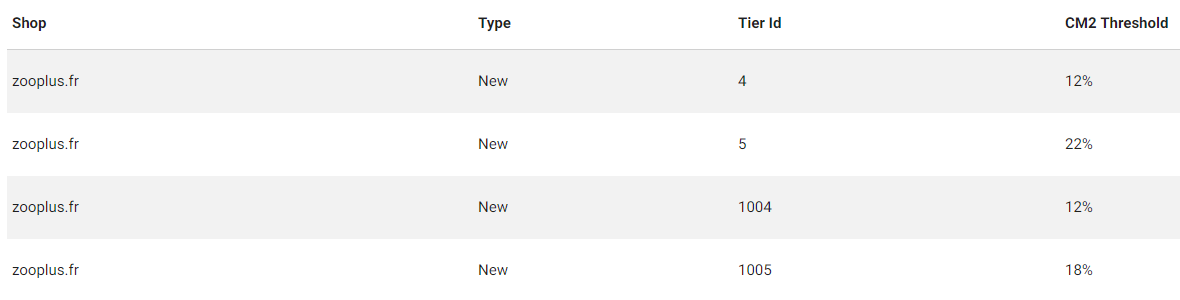

## Behaviour per Tier

Histograms show frequencies from data values in a sample. We will see those for order number (order_ko_count_net, meaning the nth order the customer has placed) and other one based on basket value.

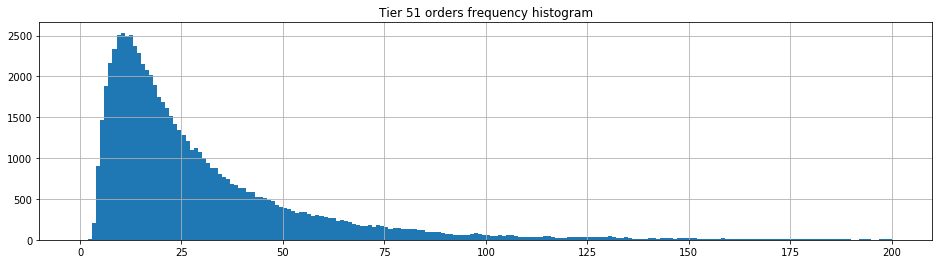

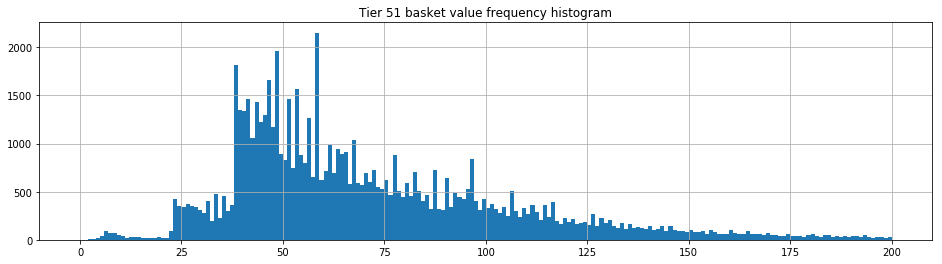

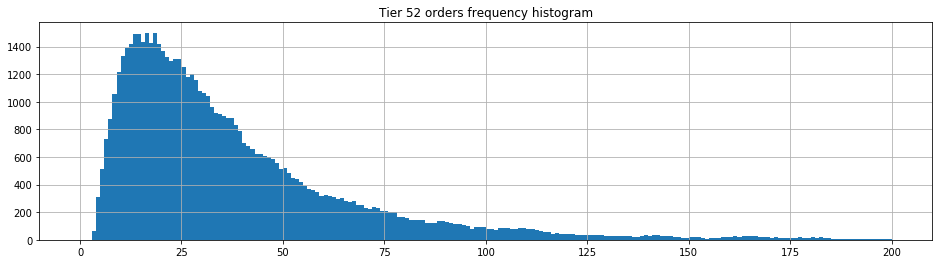

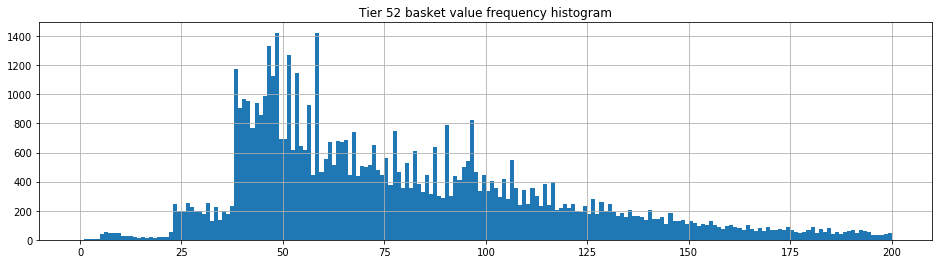

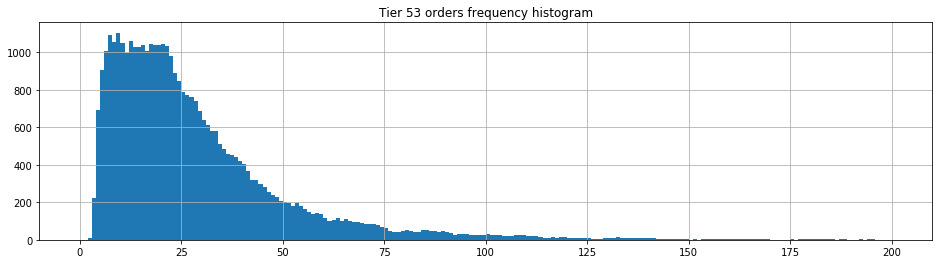

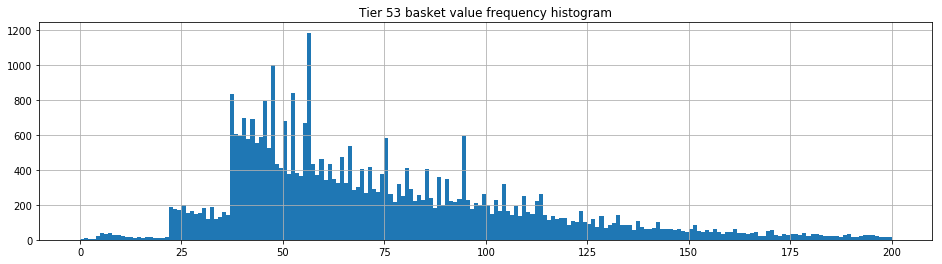

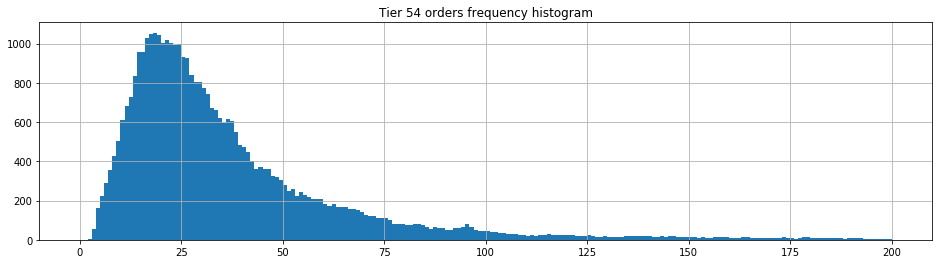

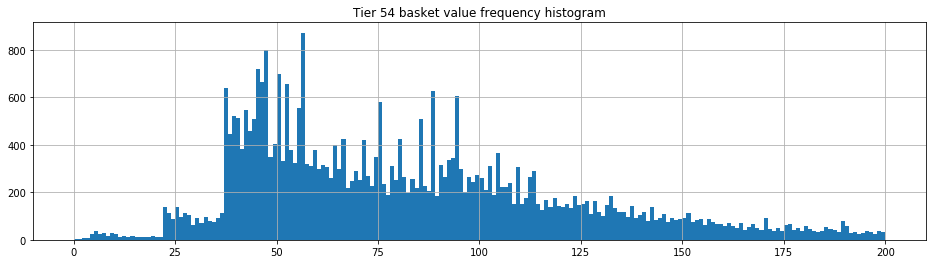

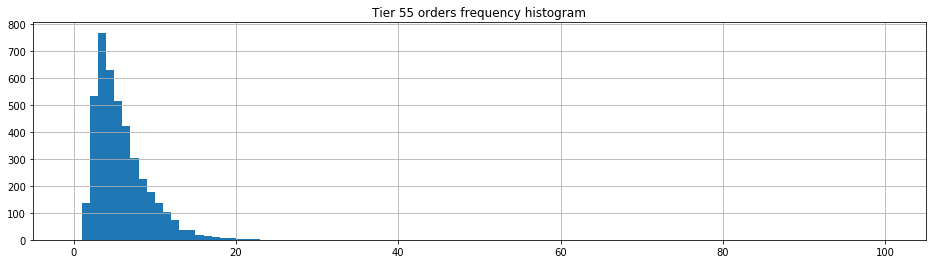

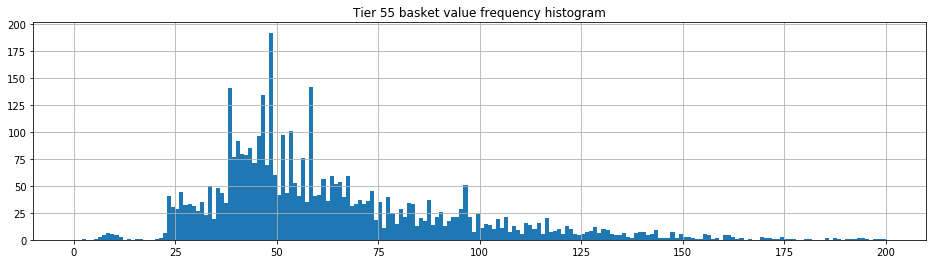

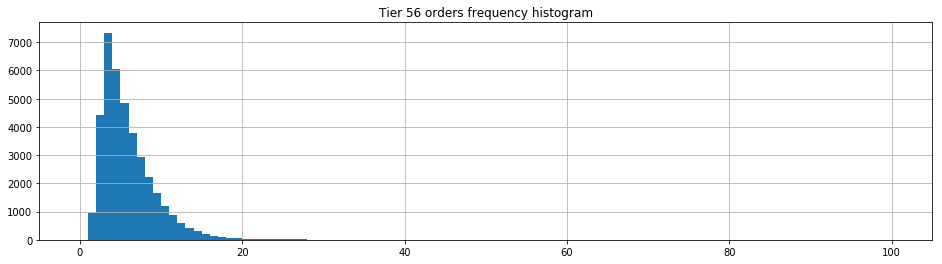

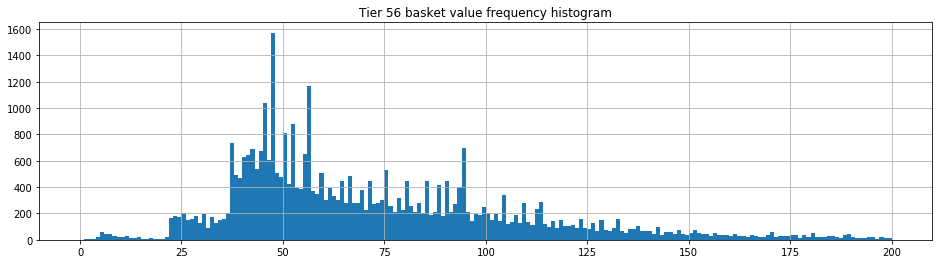

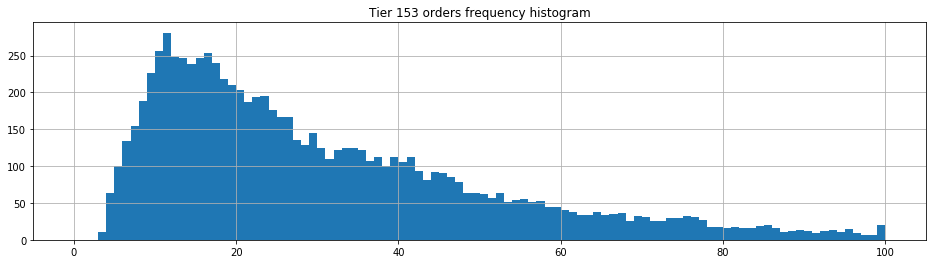

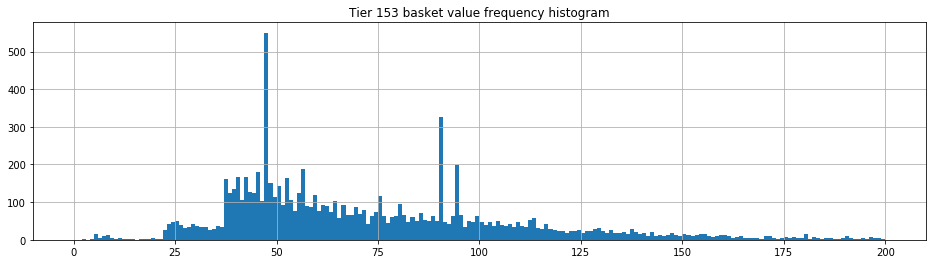

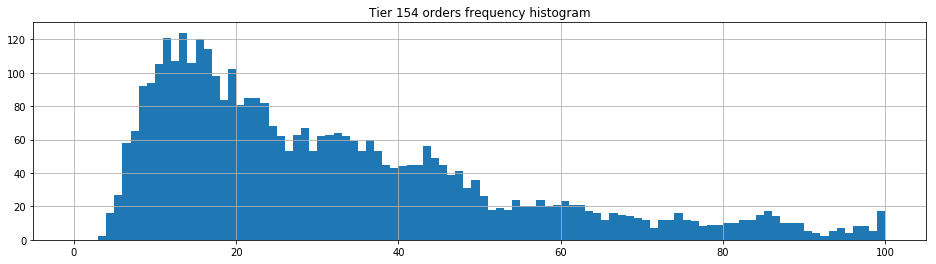

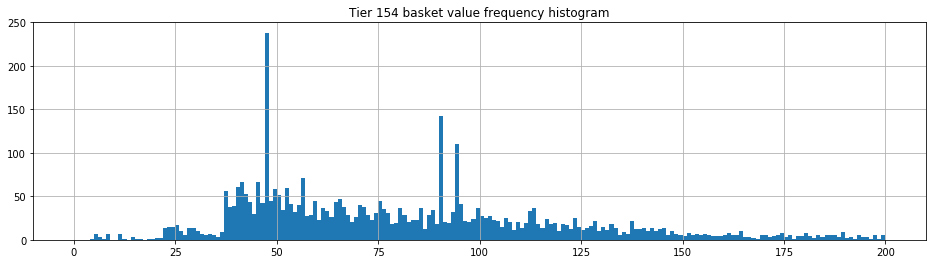

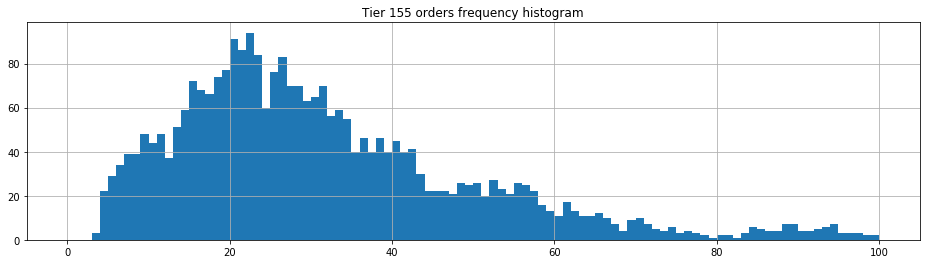

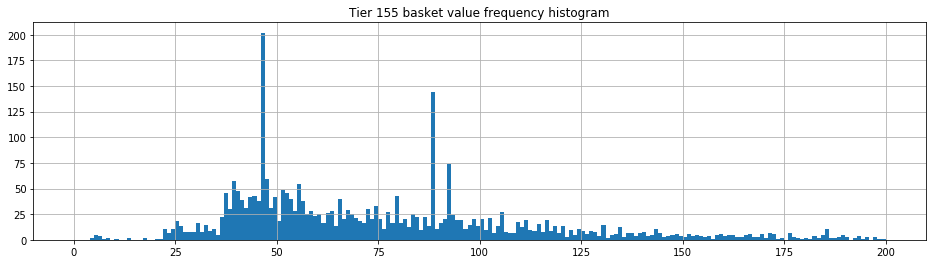

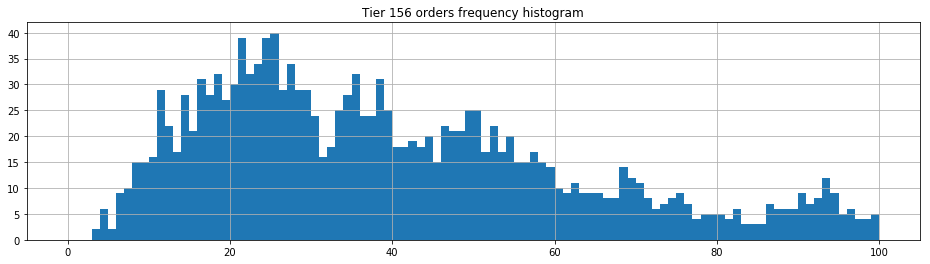

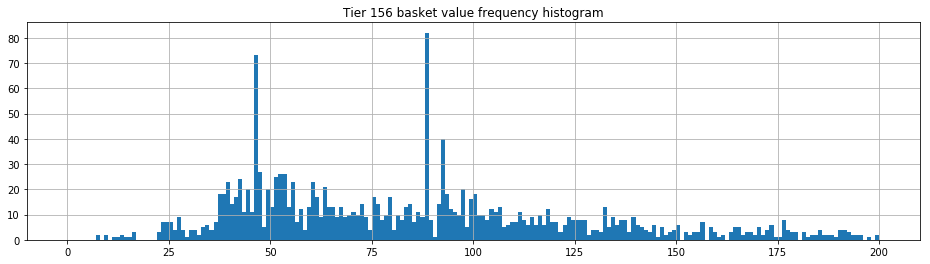

In [45]:
orders_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
basket_value_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    if tq in [51, 52, 53, 54]:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)
        
    else:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=100, range=(0, 100))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)

And gather them into two tables...

In [46]:
#ORDERS HISTOGRAM SUMMARY
orders_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,71427,30.29,30.39,2,12,21,37,478
1,52,61859,40.39,57.72,3,17,29,48,1421
2,53,38074,29.23,30.54,2,13,22,36,711
3,54,38491,39.25,52.06,2,18,28,45,1711
4,55,4169,5.32,3.2,1,3,5,7,25
5,56,38431,5.46,3.46,1,3,5,7,63
6,153,8947,36.95,36.47,3,15,26,45,321
7,154,4004,38.44,39.4,3,15,27,46,366
8,155,2975,36.72,33.33,3,19,28,43,273
9,156,1690,51.97,55.77,3,23,38,60,430


In [47]:
#BASKET VALUE HISTOGRAM SUMMARY
basket_value_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,71427,75.03,43.82,-22.86,46.55,62.53,92.14,1058.01
1,52,61859,86.05,54.24,-116.55,49.44,72.13,106.28,1648.99
2,53,38074,78.98,49.44,-14.44,47.48,65.6,96.51,927.64
3,54,38491,92.04,63.35,-69.98,51.27,78.45,112.07,2999.81
4,55,4169,65.8,40.34,-40.91,43.25,55.27,78.31,999.08
5,56,38431,77.11,47.61,-3.98,47.48,64.11,94.98,1847.05
6,153,8947,77.82,46.63,2.68,47.49,65.49,94.98,721.92
7,154,4004,88.74,55.89,4.89,49.39,76.7,108.26,740.95
8,155,2975,82.67,51.45,4.03,46.49,69.74,98.55,725.32
9,156,1690,99.54,72.43,-2.1,52.61,86.48,118.46,677.14


- Tier 53 buying behaviour and basket value really close to Tier 51. Further analysis to get new criteria for renewals.
- Tiers 153 and 154 showing similar buying frequency (15-26-45 and 15-27-46) despite of duration (1 vs 3 years). 

### Locate and quantify unprofitable  CM1 orders in absolute and relative terms regarding PG3 and PG4 levels per Tier

In [48]:
ord_cm1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [49]:
ord_neg_cm1 = ord_cm1[ord_cm1 <= 0].index.values

In [50]:
data['IS_CM1_NEG_ORDER'] = data['SCM_N_ORDER_NR'].isin(ord_neg_cm1) * 1

In [51]:
ord_coupon = data[data['SCM_MASTER_AP_ID'] == 6169]['SCM_N_ORDER_NR'].unique()

In [52]:
data['ORDER_HAS_COUPON'] = data['SCM_N_ORDER_NR'].isin(ord_coupon) * 1

In [76]:
data['BP_TYP'].unique()

array(['B ', nan], dtype=object)

In [77]:
ord_bp = data[data['BP_TYP'] == 'B ']['SCM_N_ORDER_NR'].unique()

In [78]:
ord_bp

array([101615411, 102470951, 101807619, ..., 102517687, 106493198,
       107691258], dtype=int64)

In [79]:
data['ORDER_HAS_BP'] = data['SCM_N_ORDER_NR'].isin(ord_bp) * 1

In [80]:
data['ORDER_HAS_C+BP'] = data['ORDER_HAS_COUPON'] * data['ORDER_HAS_BP']

In [81]:
import cx_Oracle

In [82]:
data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique()

array([   251,    305,     68,   2068,    252,     29,      9,     18,
         2192,    301,    857,    409,   2190,     23,   1400,     67,
           16,     36, 153317,    221,     45,   9788, 207624,     15,
           34, 207553,     33,    486,    741,   1540,     20,     51,
          401,  49828,   2155,     37, 126729,     62,     38,   1106,
          274,  48963, 122398,    758,  40023,  49821, 183134,     42,
           65,     48,   9885,   1635, 122375,    470,    484,  17947,
         2471, 255413,     47,   1603,     50,   3119,   8038],
      dtype=int64)

In [83]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [84]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')') 

In [85]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [86]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [87]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK'])}

In [88]:
pg3_dict[0] = 'null'

In [89]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [90]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(1299316, 1299316)

In [91]:
data['LEAD_PG3_NAME'] = lista_pg3

In [92]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [93]:
0 in pg4_l

False

In [94]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')') 

In [95]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [96]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [97]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [98]:
pg4_dict[-1] = 'null'

In [99]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(-1)]

In [100]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(1299316, 1299316)

In [101]:
data['LEAD_PG4_NAME'] = lista_pg4

In [102]:
from IPython.display import display

+ OSP_3_LEAD_P_PG_ID
+ LEAD_PG3_NAME
+ OSP_4_LEAD_P_PG_ID
+ LEAD_PG4_NAME
+ IS_CM1_NEG_ORDER: flag 0-1, grouping all negative or positive orders regarding to CM1
+ SCM_N_ORDER_NR: orders amount for the corresponding flag
+ ORDERS_IN_PG: orders in product group (orders in flag 0, positives, plus orders in flag 1, negatives)
+ PERC_%_IN_PG: SCM_N_ORDER_NR / ORDERS_IN_PG
+ ORDER_HAS_COUPON: total orders using coupons
+ COUPONS_IN_PG: total coupons used in product group
+ COUPONS_%_IN_PG: ORDER_HAS_COUPON / COUPONS_IN_PG
+ ORDER_HAS_BP: total orders using coupons
+ BP_IN_PG: total orders having bonuspoints as payment in product group
+ BP_%_IN_PG: ORDER_HAS_BP / BP_IN_PG
+ SCM_D_FINANCE_CM1: CM1 sum from the orders in the flag
+ PERC_%_TOTAL_LOSS: CM1 sum divided by the total loss CM1 (sum CM1 for all negative CM1 orders)

In [103]:
orders_CM1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
orders_CM1_neg = orders_CM1[orders_CM1 <= 0].index.values
print('Total orders: ', len(orders_CM1))
print('Total orders with negative CM1: ', len(orders_CM1_neg))
print('% of negative CM1 orders: ', len(orders_CM1_neg) / len(orders_CM1) * 100)
print('Total loss of CM1 (sum CM1 for all negative CM1 orders): ', orders_CM1[orders_CM1 <= 0].sum())
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG3 [Top 20]')
grp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                            as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_COUPON'].mean()
grp_bp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_BP'].mean()
grp_cbp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_C+BP'].mean()
df1 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc = grp_c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp = grp_bp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfbpc = grp_cbp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df3 = pd.merge(df1, df2, left_index=True, right_index=True, copy=False)
dfcbp = pd.merge(dfc, dfbp, left_index=True, right_index=True, copy=False)
df3cbp = pd.merge(df3, dfcbp, left_index=True, right_index=True, copy=False)
df_c_bp = pd.merge(df3cbp, dfbpc, left_index=True, right_index=True, copy=False)
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x', 'SCM_N_ORDER_NR',
                 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df_c_bp.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR', 
                    'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']
df_c_bp['ORDERS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['SCM_N_ORDER_NR'].transform('sum')
df_c_bp['PERC_%_IN_PG'] = df_c_bp['SCM_N_ORDER_NR'] / df_c_bp['ORDERS_IN_PG'] * 100
df_c_bp['COUPONS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_COUPON'].transform('sum')
#df3cbp['COUPONS_%_IN_PG'] = df3cbp['ORDER_HAS_COUPON'] / df3cbp['COUPONS_IN_PG'] * 100
df_c_bp['BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_BP'].transform('sum')
#df3cbp['BP_%_IN_PG'] = df3cbp['ORDER_HAS_BP'] / df3cbp['BP_IN_PG'] * 100
df_c_bp['C+BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_C+BP'].transform('sum')
df_c_bp['PERC_%_TOTAL_LOSS'] = df_c_bp['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR','ORDERS_IN_PG', 'PERC_%_IN_PG',
              'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG',
              'ORDER_HAS_C+BP', 'C+BP_IN_PG', 'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df_c_bp.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG4 [Top 20]')
grp_2 = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_2c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].mean()
grp_2b = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].mean()
grp_2cb = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].mean()
df1_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc_2 = grp_2c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp_2 = grp_2b.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfcbp_2 = grp_2cb.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df4 = pd.merge(df1_2, df2_2, left_index=True, right_index=True, copy=False)
dfc_2 = pd.merge(dfc_2, dfbp_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4, dfc_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4c, dfcbp_2, left_index=True, right_index=True, copy=False)
df4c = df4c[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'OSP_4_LEAD_P_PG_ID_x_x', 'LEAD_PG4_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x',
                 'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df4c.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER',
                    'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP','SCM_D_FINANCE_CM1']
df4c['ORDERS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['SCM_N_ORDER_NR'].transform('sum')
df4c['PERC_%_IN_PG'] = df4c['SCM_N_ORDER_NR'] / df4c['ORDERS_IN_PG'] * 100
df4c['COUPONS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_COUPON'].transform('sum')
#df4c['COUPONS_%_IN_PG'] = df4c['ORDER_HAS_COUPON'] / df4c['COUPONS_IN_PG'] * 100
df4c['BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_BP'].transform('sum')
#df4c['BP_%_IN_PG'] = df4c['ORDER_HAS_BP'] / df4c['BP_IN_PG'] * 100
df4c['C+BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_C+BP'].transform('sum')
df4c['PERC_%_TOTAL_LOSS'] = df4c['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df4c = df4c[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR',
                 'ORDERS_IN_PG', 'PERC_%_IN_PG', 'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG', 
             'ORDER_HAS_C+BP', 'C+BP_IN_PG',
             'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df4c.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('........................................................................................')
print('')

Total orders:  270084
Total orders with negative CM1:  1018
% of negative CM1 orders:  0.3769197731076258
Total loss of CM1 (sum CM1 for all negative CM1 orders):  -3795.9498999999996
........................................................................................

Unprofitable CM1 orders per Lead PG3 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
33,251,hundefutter_trockenfutter,1,385,118229,0.33,272,12116,146,15942,87,2454,-1388.46,36.58
59,2068,katzenfutter_dose,1,135,31026,0.44,37,3153,55,4967,20,748,-891.77,23.49
35,252,katzenfutter_trockenfutter,1,278,67377,0.41,147,6763,102,10149,37,1494,-885.51,23.33
6,18,hundesnacks,1,59,6760,0.87,25,663,25,1243,9,175,-154.46,4.07
50,857,hundefutter_nassfutter,1,17,5962,0.29,3,603,6,909,0,138,-93.70,2.47
81,207553,ungezieferschutz,1,54,1629,3.31,7,150,17,273,4,39,-86.25,2.27
83,207624,ungezieferschutz,1,34,818,4.16,5,74,14,153,1,15,-72.66,1.91
1,9,hundebett,1,4,2475,0.16,2,215,3,328,2,38,-52.83,1.39
38,301,katzenstreu,1,13,11474,0.11,4,829,8,1567,1,173,-41.03,1.08
77,126729,royal_canin_zugabeartikel,1,2,145,1.38,0,10,0,10,0,1,-38.71,1.02


........................................................................................

Unprofitable CM1 orders per Lead PG4 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
1056,251,hundefutter_trockenfutter,311,pedigree,1,27,356,7.58,10,49,2,52,0,10,-552.57,14.56
2170,2068,katzenfutter_dose,2072,gourmet,1,50,1686,2.97,12,184,14,315,7,49,-501.21,13.20
1051,251,hundefutter_trockenfutter,283,pro_plan,1,201,16156,1.24,187,1900,64,2165,53,410,-395.22,10.41
1297,252,katzenfutter_trockenfutter,683,royal_canin,1,151,15550,0.97,100,1874,46,2324,21,408,-264.43,6.97
1547,252,katzenfutter_trockenfutter,261925,royal_canin_breed_cat,1,21,4055,0.52,18,456,11,580,8,101,-125.11,3.30
1157,251,hundefutter_trockenfutter,17798,royal_canin_breed,1,25,8733,0.29,19,839,16,1042,11,163,-121.40,3.20
1067,251,hundefutter_trockenfutter,682,royal_canin_size,1,47,21373,0.22,36,2315,24,2626,16,410,-98.43,2.59
1343,252,katzenfutter_trockenfutter,2056,sanabelle,1,9,2158,0.42,3,251,6,410,1,68,-90.27,2.38
186,18,hundesnacks,394,zahnpflege_snacks,1,29,1389,2.09,16,195,14,276,5,47,-83.74,2.21
1888,857,hundefutter_nassfutter,860,cesar,1,9,160,5.62,2,25,2,31,0,3,-69.42,1.83


........................................................................................
........................................................................................



## A level down through physical article level...

In [104]:
ap_list = list(data['SCM_AP_ID'].unique())

In [105]:
len(ap_list)

8090

In [106]:
ap_list.remove(0)

In [107]:
0 in ap_list

False

In [108]:
xlist = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
ylist = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

arts = pd.DataFrame()
for x, y in zip(xlist, ylist):
    my_list_str = repr(ap_list[x:y]).replace('[','(').replace(']',')') 
    conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
    curs = conn.cursor()
    #query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    #join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    #where to_char(ap_id) = :valores"""
    #art = pd.read_sql(query, con = conn, params={'valores': str(i)})
    query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    where ap_id in %s""" % my_list_str
    art = pd.read_sql(query, con = conn)
    arts = pd.concat((arts, art), axis=0, ignore_index=False)
    conn.close()    
    print(x, y)

0 1000
1000 2000
2000 3000
3000 4000
4000 5000
5000 6000
6000 7000
7000 8000
8000 9000


In [109]:
arts['AP_NAME'] = arts['PP_NAME'] + ' ' + arts['AP_SHORT_TEXT']

### Physical Article CM1

In [111]:
freq_list = []
for n, i in enumerate(ap_list):
    ap_id = data[data['SCM_AP_ID'] == i]
    total_orders = ap_id['SCM_N_ORDER_NR'].nunique()
    total_orders_bp = ap_id[ap_id['OP_BONUSPOINTS'] != 0]['SCM_N_ORDER_NR'].nunique()
    lis_o_ap_id_neg_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] <= 0]['SCM_N_ORDER_NR'].unique()
    lis_o_ap_id_pos_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] > 0]['SCM_N_ORDER_NR'].unique()
    cnt_o_id_neg_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_neg_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_pos_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    cnt_o_id_pos_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    prod_name = arts[arts['AP_ID'] == i]['AP_NAME'].iloc[0]
    freq_list.append([i
                    , prod_name
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['mean']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['min']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['max']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['25%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['50%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['75%']
                    , total_orders
                    , total_orders_bp
                    , cnt_o_id_neg_cm1_ap_id_neg_cm1
                    , cnt_o_id_neg_cm1_ap_id_pos_cm1
                    , cnt_o_id_pos_cm1_ap_id_neg_cm1
                    , cnt_o_id_pos_cm1_ap_id_pos_cm1
                     ])
    if n % 400 == 0:
        print(n)

0
400
800
1200
1600
2000
2400
2800
3200
3600
4000
4400
4800
5200
5600
6000
6400
6800
7200
7600
8000


In [112]:
freq_df = pd.DataFrame(freq_list, columns=['SCM_AP_ID', 'AP_NAME', 'CM1_MEAN', 'CM1_MIN', 'CM1_MAX',
                                           'PERC_25', 'PERC_50', 'PERC_75',
                                           'TOT_ORDERS', 'TOT_ORDERS_BP', 'OCM1_NEG_APCM1_NEG', 'OCM1_NEG_APCM1_POS', 
                                           'OCM1_POS_APCM1_NEG', 'OCM1_POS_APCM1_POS'])

In [113]:
freq_df['PERC_APCM1_NEG'] = (freq_df['OCM1_NEG_APCM1_NEG'] + freq_df['OCM1_POS_APCM1_NEG']) / freq_df['TOT_ORDERS'] * 100

In [114]:
freq_df['PERC_OCM1_NEG'] = freq_df['OCM1_NEG_APCM1_NEG'] / freq_df['TOT_ORDERS'] * 100

+ SCM_AP_ID: physical article id
+ AP_NAME: physical article name
+ CM1_MEAN: average CM1
+ CM1_MIN
+ CM1_MAX
+ PERC_25: percentile 25
+ PERC_50: median 
+ PERC_75: percentile 75
+ TOT_ORDERS: orders in which physical article is present
+ TOT_ORDERS_BP: orders in which physical article has been bought using bonuspoints
+ OCM1_NEG_APCM1_NEG: orders with negative cm1 having physical article in the order negative cm1 too 
+ OCM1_NEG_APCM1_POS: orders with negative cm1 having physical article in the order positive cm1
+ OCM1_POS_APCM1_NEG: orders with positive cm1 having physical article in the order negative cm1
+ OCM1_POS_APCM1_POS: orders with positive cm1 having physical article in the order positive cm1 too
+ PERC_APCM1_NEG: (OCM1_NEG_APCM1_NEG + OCM1_POS_APCM1_NEG)/ TOT_ORDERS
+ PERC_OCM1_NEG: OCM1_NEG_APCM1_NEG / TOT_ORDERS

Let's get physical artical having more than 30 orders placed and, in more than 40% of the cases, AP_ID CM1 is negative...

In [118]:
freq_df[(freq_df['TOT_ORDERS'] > 100) & (freq_df['PERC_APCM1_NEG'] > 40)].round(2)\
.sort_values(by='PERC_APCM1_NEG', ascending=False).head(60)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
8073,77014,Wolf of Wilderness 100 g - Green Fields Adult,-0.27,-0.27,-0.27,-0.27,-0.27,-0.27,407,0,0,0,407,0,100.00,0.00
421,34477,Schlüsselanhänger Filz - Frankreich,-0.53,-6.45,-0.43,-0.43,-0.43,-0.43,226,222,1,0,225,0,100.00,0.44
3249,78911,"Purizon Cat Kitten Huhn & Fisch ""BDAY Freebie ...",-2.19,-2.19,-2.19,-2.19,-2.19,-2.19,196,0,3,0,193,0,100.00,1.53
2892,78910,"Purizon Cat Huhn & Fisch ""BDAY Freebie 2018” -...",-2.19,-2.19,-2.19,-2.19,-2.19,-2.19,392,0,0,0,392,0,100.00,0.00
2859,78912,"WoW 1 kg Taste of Canada “BDAY Freebie 2018"" -...",-2.37,-2.37,-2.37,-2.37,-2.37,-2.37,679,0,6,0,673,0,100.00,0.88
58,9795,Spende für bedürftige Tiere -,0.00,0.00,0.00,0.00,0.00,0.00,5438,5416,33,0,5405,0,100.00,0.61
1122,73148,Cosma Snackies Duo - 75% Hühnerbrust & 25% Thu...,-1.52,-1.52,-1.52,-1.52,-1.52,-1.52,246,245,3,0,243,0,100.00,1.22
141,20886,Extra Bonuspunkte - 200 Bonuspunkte extra,0.00,0.00,0.00,0.00,0.00,0.00,1368,0,5,0,1363,0,100.00,0.37
739,23170,Extra Bonuspunkte - 100 Bonuspunkte extra,0.00,0.00,0.00,0.00,0.00,0.00,423,0,2,0,421,0,100.00,0.47
492,69684,CFL Labrador Retriever Adult - 80 g,-0.96,-1.16,0.16,-1.15,-1.15,-0.77,208,0,6,1,202,0,100.00,2.88


In [119]:
freq_df[freq_df['TOT_ORDERS'] > 30].round(2)\
.sort_values(by='PERC_OCM1_NEG', ascending=False).head(30)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
4102,71795,Pedigree Adult Maxi mit Rind - 15 kg,7.75,-9.24,13.42,7.04,13.26,13.26,63,0,9,0,3,51,19.05,14.29
5477,24722,Pueblo Katzenhaus L 56 x B 36 x H 42 cm,4.71,-16.95,21.09,-15.92,12.21,15.74,56,18,8,0,10,38,32.14,14.29
2517,71812,Pedigree Adult Geflügel - 15 kg,7.89,-9.24,14.13,7.04,7.14,13.26,121,0,15,0,6,100,17.36,12.40
291,7505,Pedigree Junior Huhn + Reis - 15 kg,7.87,-9.24,14.09,7.04,13.26,13.26,58,0,7,0,4,47,18.97,12.07
5819,1423,Pedigree Junior Maxi Huhn + Reis - 15 kg,7.46,-9.24,13.44,7.04,7.14,13.26,80,0,9,0,1,70,12.50,11.25
3842,19031,Hundebett Variabel - 80 x 110 cm,1.87,-13.40,32.84,-12.66,11.59,15.80,160,77,17,0,61,82,48.75,10.62
3137,56881,Megapack Gourmet Gold Feine Pastete 12 x 85g -...,0.84,-4.34,6.89,-0.21,1.64,1.73,162,0,16,0,28,118,27.16,9.88
4802,71792,Pedigree Senior 8+ - 13 kg,4.12,-10.00,13.47,-5.00,6.66,6.76,54,0,5,0,7,42,22.22,9.26
113,71794,Pedigree Adult mit Rind & Gemüse - 15 kg,7.93,-9.24,14.09,7.04,7.14,13.26,139,0,11,0,9,119,14.39,7.91
2881,62931,Greenies 170 g - regular,4.10,-0.74,25.85,-0.15,2.17,4.34,38,0,3,0,9,26,31.58,7.89


## Let's try to identify resellers using true customer logic...

How can we label a root customer as reseller? Let's focus on: 
+ Having monthly net sales > 750€
+ Placing > 15 orders per month

In [120]:
dat = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['FINANCE_ORDER_NET'].mean()
dt = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['SCM_D_FINANCE_CM2'].sum()

In [121]:
d1 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['FINANCE_ORDER_NET'].sum()
d2 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_N_ORDER_NR'].count()
d12 = pd.merge(d1, d2, right_index=True, left_index=True, copy=False)
d3 = dt.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_D_FINANCE_CM2'].sum()
d4 = pd.merge(d3, d12, right_index=True, left_index=True, copy=False)
d4 = d4[['ORF_EXT_ROOT_K_ID_x', 'MONTH_NUMBER_x', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']]
d4.columns = ['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']

In [122]:
resellers = d4[(d4['FINANCE_ORDER_NET'] > 750) & (d4['SCM_N_ORDER_NR'] > 15)].sort_values(by='SCM_D_FINANCE_CM2')
resellers.round(2)

,ORF_EXT_ROOT_K_ID,MONTH_NUMBER,FINANCE_ORDER_NET,SCM_N_ORDER_NR,SCM_D_FINANCE_CM2
183628,15907945,3,889.62,16,5.81
76458,7516067,3,2552.12,17,167.83
80373,7790053,1,1488.36,17,305.65
80374,7790053,2,1741.57,20,383.54
80375,7790053,3,2835.49,33,643.60


In [123]:
# 3 root_customer_id
list(resellers['ORF_EXT_ROOT_K_ID'].unique())

[15907945, 7516067, 7790053]

In [124]:
# 3 customer_id tagged as resellers...
data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]['CUS_N_KEY_CUSTOMER'].unique()

array([15907945,  7790053,  8366851], dtype=int64)

In [125]:
metrics_resellers_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 
                                              'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 
                                              'loss_in_CM2'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    d_res = data_tier[data_tier['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]
    
    df_elems = []
    df_elems.append(tq)
    
    if d_res['CUS_N_KEY_CUSTOMER'].nunique() != 0:
        df_elems.append(d_res['CUS_N_KEY_CUSTOMER'].nunique())
        df_elems.append(d_res['SCM_N_ORDER_NR'].nunique())
        df_elems.append((d_res['SCM_SALES_BMF'] - d_res['SCM_SALES_CANCEL_BMF']).sum())
        df_elems.append(d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
        cm1_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
        cm1_per_order[cm1_per_order <= 0].sum()
        orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
        df_elems.append(len(orders_neg_cm1)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
        cm2_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
        cm2_per_order[cm2_per_order <= 0].sum()
        orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
        orders_only_neg_cm2 = d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
        [d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
        orders_only_neg_cm2.sum()
    
        df_elems.append(len(orders_neg_cm2)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    else:
        df_elems = df_elems + [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_resellers_ztq.columns)
    metrics_resellers_ztq = metrics_resellers_ztq.append(new_row, ignore_index=True)

In [126]:
metrics_resellers_ztq['orders%'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_resellers_ztq['sales_bmf%'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_resellers_ztq['net_sales%'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

And see the impact in the whole tier...

In [127]:
#Resellers activity per tier
metrics_resellers_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2,orders%,sales_bmf%,net_sales%
0,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,52,1,70,7266.03,6065.42,2209.91,1332.79,36.4346,21.9736,0,0,0,0,0.113161,0.136507,0.134918
2,53,1,28,5883.06,5031.71,1098.64,388.761,21.8343,7.72623,3.57143,-7.9633,14.2857,-44.835,0.073541,0.195637,0.197105
3,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,56,1,1,69.32,57.7667,17.1667,10.648,29.7173,18.4328,0,0,0,0,0.00260207,0.00233926,0.00231447
6,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,154,1,31,2318.31,1934.8,339.473,63.012,17.5456,3.25677,6.45161,-18.6533,35.4839,-48.8583,0.774226,0.652435,0.639346
8,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
metrics_ztq['active_resellers'] = metrics_resellers_ztq['active_customers']
metrics_ztq['perc_orders_resellers'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_ztq['perc_sales_bmf_resellers'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_ztq['perc_net_sales_resellers'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100
metrics_ztq['perc_CM1_resellers'] =  metrics_resellers_ztq['CM1'] / metrics_ztq['CM1'] * 100
metrics_ztq['perc_CM2_resellers'] =  metrics_resellers_ztq['CM2'] / metrics_ztq['CM2'] * 100
metrics_ztq['CM1%_resellers'] = metrics_resellers_ztq['CM1%']
metrics_ztq['CM2%_resellers'] = metrics_resellers_ztq['CM2%']
metrics_ztq['orders_%_neg_cm1_resellers'] = metrics_resellers_ztq['orders_%_neg_cm1']
metrics_ztq['orders_%_neg_cm2_resellers'] = metrics_resellers_ztq['orders_%_neg_cm2']
metrics_ztq['perc_loss_in_CM1_resellers'] = metrics_resellers_ztq['loss_in_CM1'] / metrics_ztq['loss_in_CM1'] * 100
metrics_ztq['perc_loss_in_CM2_resellers'] = metrics_resellers_ztq['loss_in_CM2'] / metrics_ztq['loss_in_CM2'] * 100

In [129]:
metrics_zqt_res = metrics_ztq[['ZTQ', 'active_customers', 'active_resellers', 'orders', 'perc_orders_resellers', 'sales_bmf', 
            'perc_sales_bmf_resellers', 'net_sales', 'perc_net_sales_resellers', 'CM1', 'perc_CM1_resellers',
            'CM2', 'perc_CM2_resellers', 'CM1%', 'CM1%_resellers', 'CM2%', 'CM2%_resellers',
            'orders_%_neg_cm1', 'orders_%_neg_cm1_resellers', 'loss_in_CM1', 'perc_loss_in_CM1_resellers',
            'orders_%_neg_cm2', 'orders_%_neg_cm2_resellers', 'loss_in_CM2', 'perc_loss_in_CM2_resellers']]

### Resellers impact per tier...

In [130]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[:9]]

,ZTQ,active_customers,active_resellers,orders,perc_orders_resellers,sales_bmf,perc_sales_bmf_resellers,net_sales,perc_net_sales_resellers
0,51,37197,0,71427,0,5359418.22,0,4539145.26,0
1,52,31727,1,61859,0.113161,5322824.86,0.136507,4495635.65,0.134918
2,53,19346,1,38074,0.073541,3007124.61,0.195637,2552810.99,0.197105
3,54,19571,0,38491,0,3542784.52,0,2994144.05,0
4,55,2682,0,4169,0,274334.71,0,230935.22,0
5,56,23208,1,38431,0.00260207,2963330.91,0.00233926,2495890.70,0.00231447
6,153,4393,0,8947,0,696271.74,0,590858.89,0
7,154,1958,1,4004,0.774226,355332.20,0.652435,302622.33,0.639346
8,155,1539,0,2975,0,245936.62,0,208853.22,0
9,156,818,0,1690,0,168214.17,0,143232.07,0


In [131]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[9:19]]

,CM1,perc_CM1_resellers,CM2,perc_CM2_resellers,CM1%,CM1%_resellers,CM2%,CM2%_resellers,orders_%_neg_cm1,orders_%_neg_cm1_resellers
0,1306544.22,0,569489.85,0,28.78,0,12.55,0,0.23,0
1,1255339.44,0.176041,541429.32,0.246161,27.92,36.4346,12.04,21.9736,0.38,0
2,738072.55,0.148852,328665.70,0.118285,28.91,21.8343,12.87,7.72623,0.33,3.57143
3,792486.24,0,328336.50,0,26.47,0,10.97,0,0.57,0
4,65730.87,0,26538.03,0,28.46,0,11.49,0,0.24,0
5,645229.01,0.00266056,247625.73,0.00430004,25.85,29.7173,9.92,18.4328,0.40,0
6,147753.83,0,50682.03,0,25.01,0,8.58,0,0.37,0
7,72549.59,0.467919,25351.48,0.248554,23.97,17.5456,8.38,3.25677,0.72,6.45161
8,49647.39,0,15688.36,0,23.77,0,7.51,0,0.74,0
9,30912.48,0,8749.11,0,21.58,0,6.11,0,1.72,0


In [132]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[19:]]

,loss_in_CM1,perc_loss_in_CM1_resellers,orders_%_neg_cm2,orders_%_neg_cm2_resellers,loss_in_CM2,perc_loss_in_CM2_resellers
0,-817.46,-0,10.20,0,-19714.32,-0
1,-989.96,-0,11.94,0,-22579.42,-0
2,-413.26,1.92693,12.56,14.2857,-13133.35,0.341383
3,-862.73,-0,16.60,0,-20445.75,-0
4,-23.66,-0,13.41,0,-1173.69,-0
5,-318.96,-0,19.06,0,-19926.75,-0
6,-53.96,-0,19.43,0,-4468.69,-0
7,-118.81,15.6998,20.00,35.4839,-2497.75,1.95609
8,-74.43,-0,26.45,0,-2105.68,-0
9,-122.71,-0,27.93,0,-1945.35,-0


During Q1 time window:

- Not big impact from supossed-to-be resellers...pay attention to reseller from Tier 154, mostly unefficient in CM2, having a CM2 of 3% and 35% of his orders (31) are negative.

### Resellers activity by account

In [133]:
resellers_by_account = pd.DataFrame(columns=['CUSTOMER_ID', 'ROOT_CUSTOMER_ID','ZTQ_ID', 'orders', 'sales_bmf', 'net_sales', 
                                             'CM1', 'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 
                                             'orders_%_neg_cm2', 'loss_in_CM2'])

rsllrs = data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]

for cus in rsllrs['CUS_N_KEY_CUSTOMER'].unique(): 
    df_elems = []
    df_elems.append(cus)
    rs_data = rsllrs[rsllrs['CUS_N_KEY_CUSTOMER'] == cus]
    df_elems.append(rs_data['ORF_EXT_ROOT_K_ID'].iloc[0])
    df_elems.append(rs_data['CZP_ZTQ_ID'].unique())
    df_elems.append(rs_data['SCM_N_ORDER_NR'].nunique())
    df_elems.append((rs_data['SCM_SALES_BMF'] - rs_data['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append(rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
    cm1_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm1)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm2)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
        
    new_row = pd.DataFrame.from_records([df_elems], columns=resellers_by_account.columns)
    resellers_by_account = resellers_by_account.append(new_row, ignore_index=True)

In [134]:
resellers_by_account.round(2).sort_values(by='loss_in_CM1')

,CUSTOMER_ID,ROOT_CUSTOMER_ID,ZTQ_ID,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,15907945,15907945,"[56, 154]",32,2387.63,1992.57,356.64,73.66,17.90,3.70,6.25,-18.65,34.38,-48.86
2,8366851,7516067,[53],28,5883.06,5031.71,1098.64,388.76,21.83,7.73,3.57,-7.96,14.29,-44.84
1,7790053,7790053,[52],70,7266.03,6065.42,2209.91,1332.79,36.43,21.97,0.00,0.00,0.00,0.00


#### Customer ID 15907945

In [135]:
data[data['CUS_N_KEY_CUSTOMER'] == 15907945].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 15907945].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
107430106    -1.2950
107498052   -17.3583
Name: SCM_D_FINANCE_CM1, dtype: float64

In [136]:
data[data['SCM_N_ORDER_NR'] == 107498052][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
1160990,458427861,107498052,2018-03-27,11:45,4,15907945,-2.65,0.0,-2.2083,-2.2083,-2.2083,0,6,42715,0,L,0,F,0,0
1160991,458427859,107498052,2018-03-27,11:45,4,15907945,0.00,0.0,-11.6800,-13.3891,0.0000,50126,1557154,50126,0,L,0,F,327,2
1160992,458427858,107498052,2018-03-27,11:45,4,15907945,22.99,0.0,3.1783,1.0283,19.1583,67363,1729070,67363,0,L,0,F,327,2
1160993,458427857,107498052,2018-03-27,11:45,4,15907945,29.99,0.0,5.2317,2.4799,24.9917,52641,929164,52641,0,L,0,F,327,2
1160994,458427860,107498052,2018-03-27,11:45,4,15907945,0.00,0.0,-11.8800,-13.2048,0.0000,50105,1557080,50105,0,L,0,F,327,2


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
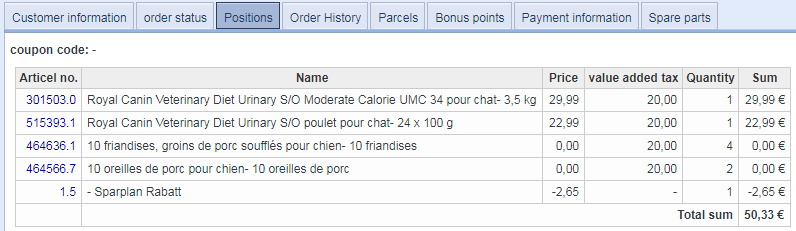

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
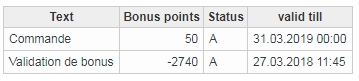

In [137]:
data[data['SCM_N_ORDER_NR'] == 107430106][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,LEAD_PG3_NAME,LEAD_PG4_NAME,ORDER_HAS_BP,ORDER_HAS_C+BP
1160995,1.545729,-14.934673,13,3,1,0,ungezieferschutz,halsband,0,0
1160996,-5.264322,-5.264322,13,3,1,0,ungezieferschutz,halsband,0,0


#### Customer ID 8366851

In [138]:
data[data['CUS_N_KEY_CUSTOMER'] == 8366851].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 8366851].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
107581145   -7.9633
Name: SCM_D_FINANCE_CM1, dtype: float64

In [139]:
data[data['SCM_N_ORDER_NR'] == 107581145][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,LEAD_PG3_NAME,LEAD_PG4_NAME,ORDER_HAS_BP,ORDER_HAS_C+BP
1198480,1.577316,-2.701501,13,3,1,1,ungezieferschutz,halsband,0,0
1198481,-2.148675,-2.148675,13,3,1,1,ungezieferschutz,halsband,0,0
1198482,-5.261847,-5.261847,13,3,1,1,ungezieferschutz,halsband,0,0


### Behaviours:
- Huge amount of bonuspoints to get products free
- Coupons used in combination with halsband

### Working on renewal logic and eligibility

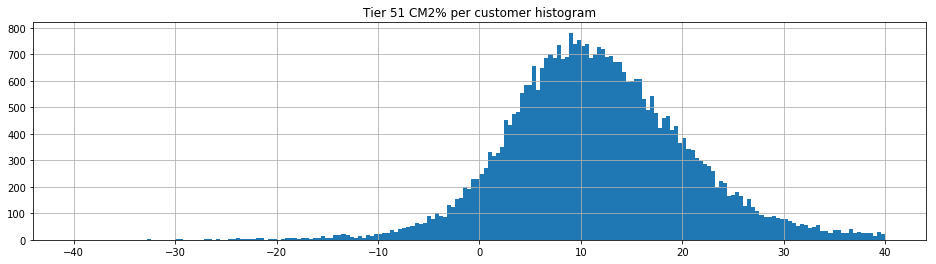

count    37197.000000
mean        11.769501
std          9.232182
min       -175.665116
25%          5.966343
50%         11.194122
75%         17.053109
max         76.232582
dtype: float64

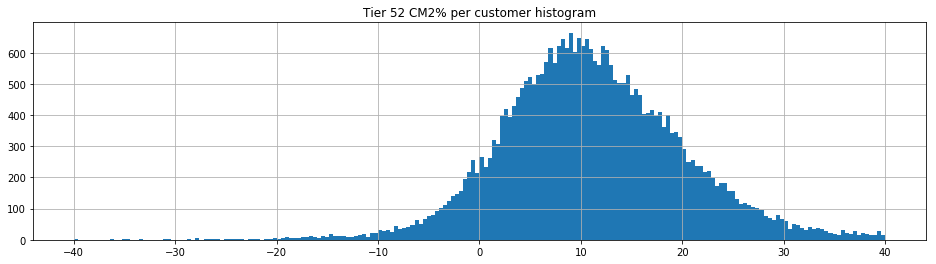

count    3.172700e+04
mean    -1.996665e+13
std      3.556475e+15
min     -6.334820e+17
25%      5.350148e+00
50%      1.063581e+01
75%      1.666984e+01
max      6.979889e+01
dtype: float64

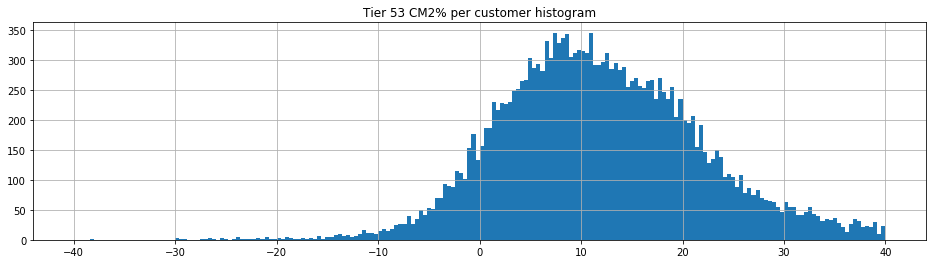

count    19346.000000
mean        12.168535
std         11.362924
min       -618.580409
25%          5.229531
50%         11.338847
75%         18.426226
max         64.878127
dtype: float64

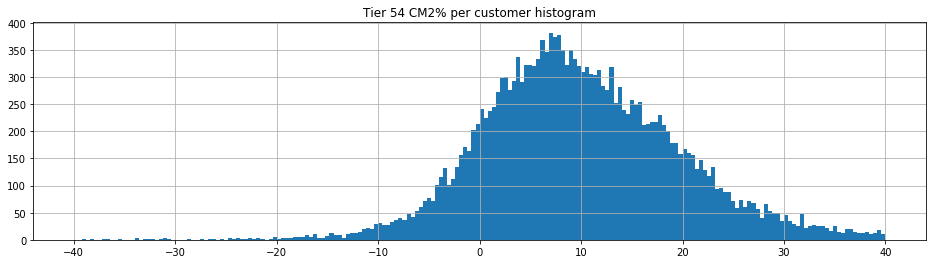

count    19571.000000
mean        10.128587
std         10.332361
min       -276.470962
25%          3.536177
50%          9.252535
75%         16.126452
max         69.279141
dtype: float64

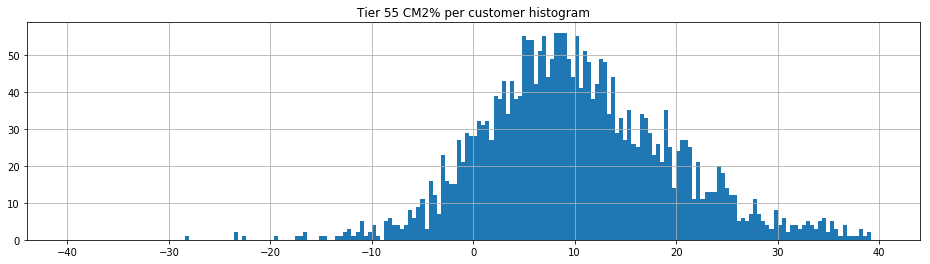

count    2682.000000
mean       10.570410
std         9.746781
min       -28.221016
25%         4.221599
50%         9.534348
75%        16.257180
max        56.042865
dtype: float64

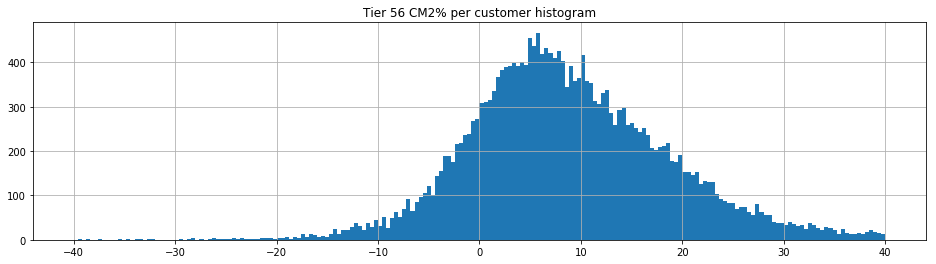

count    2.320800e+04
mean             -inf
std               NaN
min              -inf
25%      2.393484e+00
50%      7.947710e+00
75%      1.492940e+01
max      6.350271e+01
dtype: float64

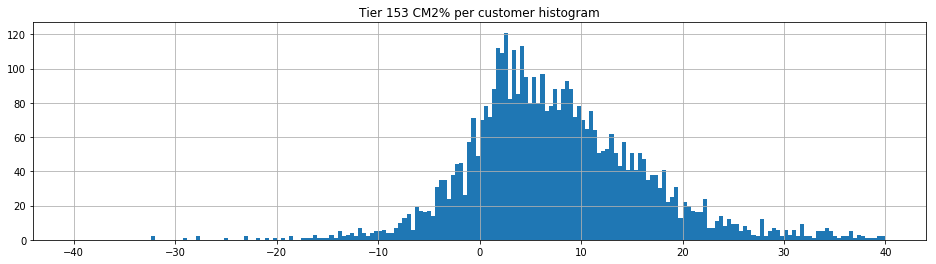

count    4393.000000
mean        7.640014
std         9.022816
min       -95.532882
25%         2.025044
50%         6.569435
75%        12.549009
max        50.596787
dtype: float64

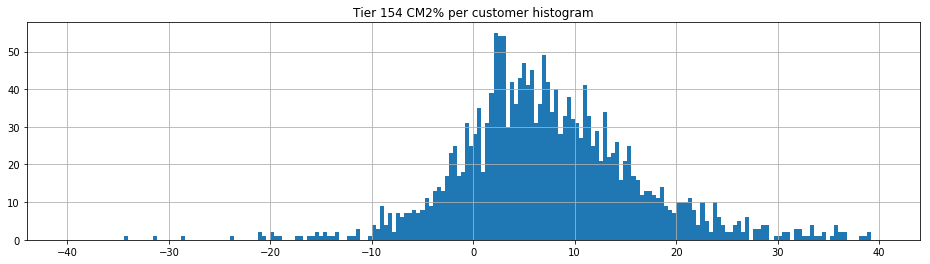

count    1958.000000
mean        7.494267
std         9.009057
min       -34.028806
25%         2.100499
50%         6.706696
75%        12.310512
max        46.234731
dtype: float64

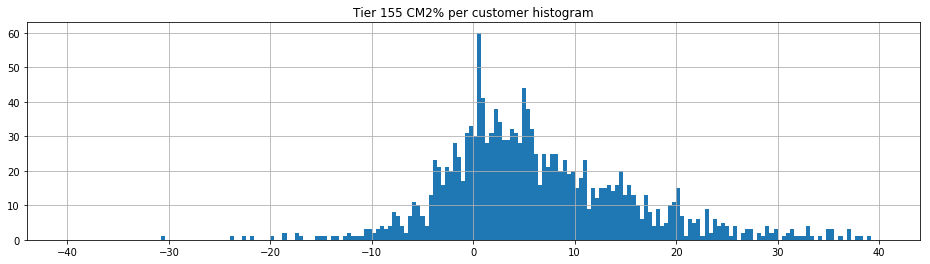

count    1539.000000
mean        6.438313
std         9.620715
min       -41.251139
25%         0.434617
50%         4.843778
75%        11.417617
max        49.915704
dtype: float64

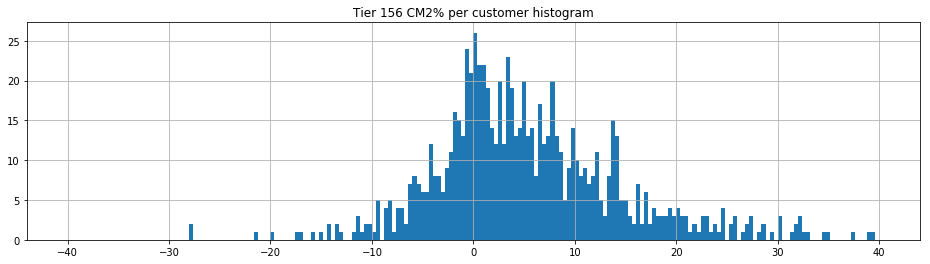

count    818.000000
mean       5.325700
std        9.213387
min      -27.905661
25%       -0.364414
50%        3.827470
75%       10.121614
max       39.438801
dtype: float64

In [140]:
for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    plt.figure(figsize=(16,4))
    cm2_per_cust.hist(bins=200, range=(-40, 40))
    title = 'Tier ' + str(tq) + ' CM2% per customer histogram'
    plt.title(title)
    plt.show()
    display(cm2_per_cust.describe())

In [141]:
cm2_thresholds = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
cm2_thres_df = pd.DataFrame(columns=['ZTQ_ID', 'CM2%_threshold', 'eligibles'] )

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    
    for thres in cm2_thresholds:
        cm2_per_cust[cm2_per_cust > thres]
        cust_cm2 = cm2_per_cust[cm2_per_cust > thres].index.values
        row_ = [tq, thres, len(cust_cm2)]
        row_ = pd.DataFrame([row_], columns=cm2_thres_df.columns)
        cm2_thres_df = pd.concat([cm2_thres_df, row_], ignore_index=True)

Total customers in Tier  51 :  37197
Total customers in Tier  52 :  31727


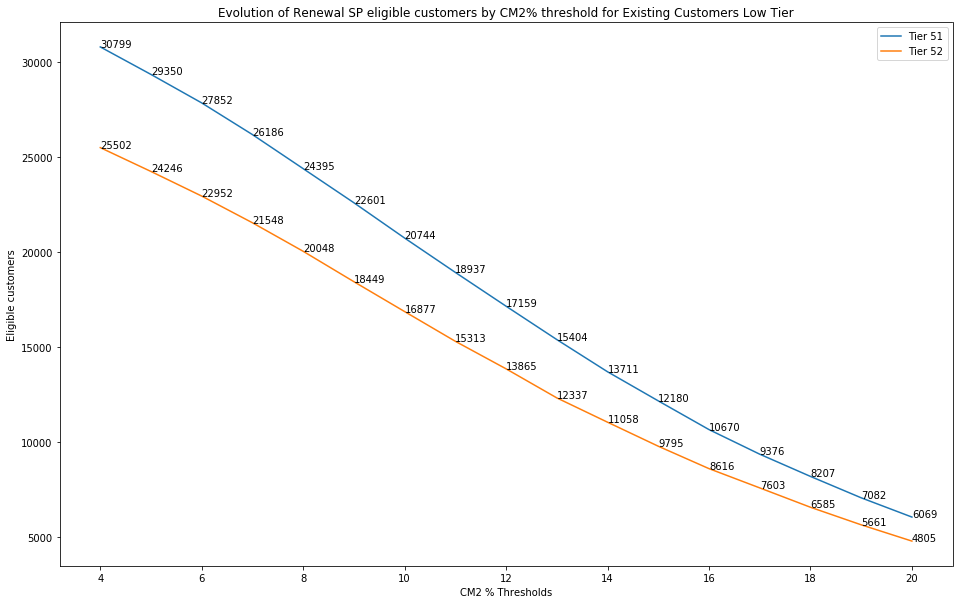

In [142]:
for tq in ztq[:2]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))
    
plt.figure(figsize=(16, 10))

for tq in ztq[:2]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers Low Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 51', 'Tier 52'])
plt.show()

Total customers in Tier  53 :  19346
Total customers in Tier  54 :  19571


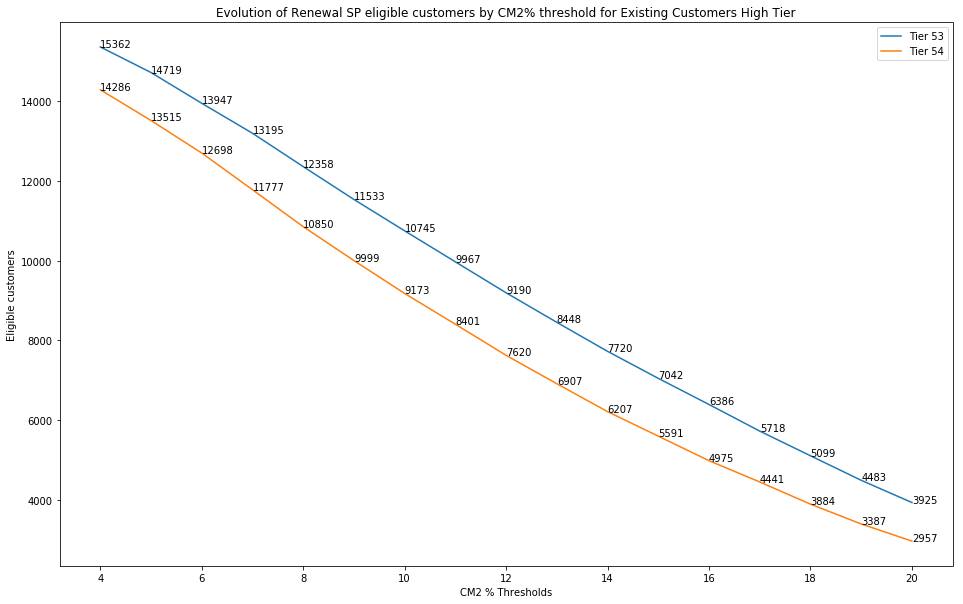

In [143]:
for tq in ztq[2:4]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[2:4]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers High Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 53', 'Tier 54'])
plt.show()

Total customers in Tier  55 :  2682
Total customers in Tier  56 :  23208


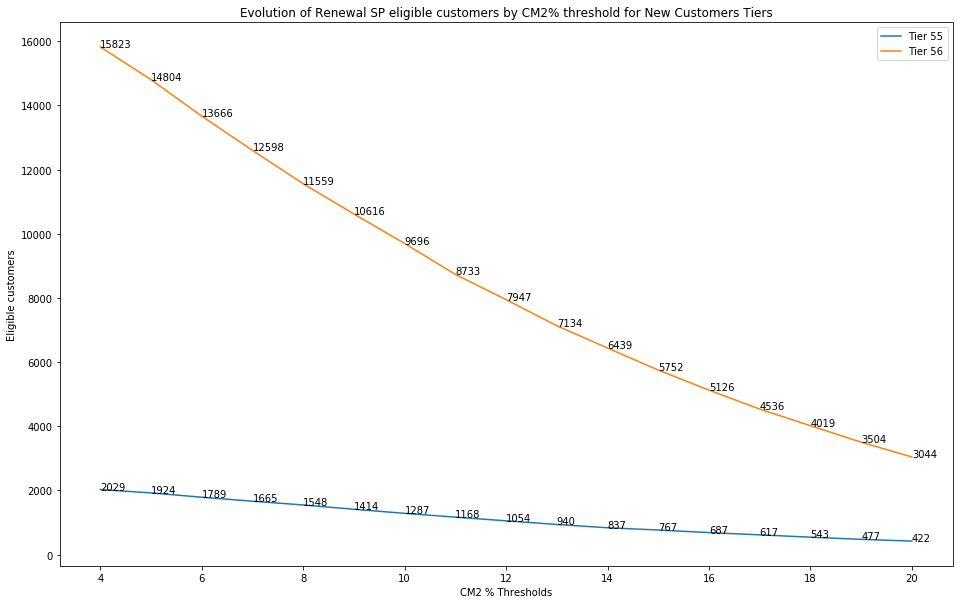

In [144]:
for tq in ztq[4:6]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[4:6]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for New Customers Tiers')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 55', 'Tier 56'])
plt.show()

Total customers in Tier  153 :  4393
Total customers in Tier  154 :  1958
Total customers in Tier  155 :  1539
Total customers in Tier  156 :  818


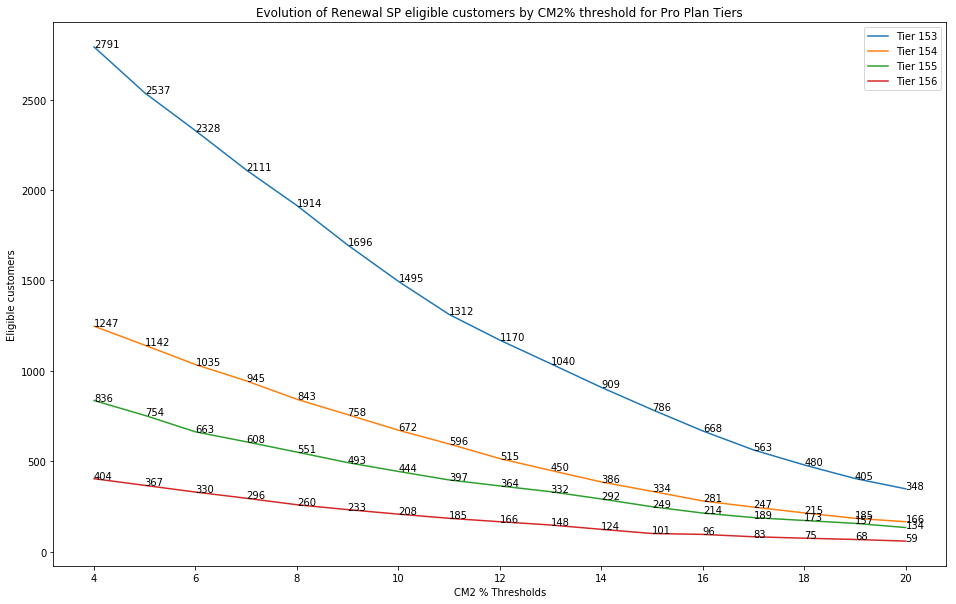

In [146]:
for tq in ztq[6:]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[6:]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Pro Plan Tiers')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 153', 'Tier 154', 'Tier 155', 'Tier 156'])
plt.show()

In [147]:
sp_customers = pd.DataFrame(columns=['CUSTOMER_ID', 'TIER', 'ORDERS', 'SALES', 'NET_SALES', 'BASKET_AVG', 'CM1', 'CM1_AVG',
                                    'CM1%', '%_NEG_CM1_ORD', 'LOSS_IN_CM1', 'CM2', 'CM2_AVG',
                                    'CM2%', '%_NEG_CM2_ORD', 'LOSS_IN_CM2'])

for cus in data['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = data[data['CUS_N_KEY_CUSTOMER'] == cus]
    tier = cus_data['CZP_ZTQ_ID'].unique()
    orders = cus_data['SCM_N_ORDER_NR'].nunique()
    sales = cus_data['SCM_SALES_BMF'].sum() - cus_data['SCM_SALES_CANCEL_BMF'].sum() 
    net_sales = cus_data['SCM_D_ORIG_FINANCE_ORDER_NET'].sum()
    basket_avg = sales / orders
    cm1 = cus_data['SCM_D_FINANCE_CM1'].sum()
    cm1_avg = cm1 / orders
    cm1_perc = cm1 / net_sales * 100
    neg_cm1_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)
    perc_neg_cm1_orders = neg_cm1_orders / orders * 100
    total_loss_cm1 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].sum()
    cm2 = cus_data['SCM_D_FINANCE_CM2'].sum()
    cm2_avg = cm2 / orders
    cm2_perc = cm2 / net_sales * 100
    neg_cm2_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].index.values)
    perc_neg_cm2_orders = neg_cm2_orders / orders * 100
    total_loss_cm2 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].sum()
    row_ = [cus, tier, orders, sales, net_sales, basket_avg, cm1, cm1_avg, cm1_perc, perc_neg_cm1_orders, total_loss_cm1,
           cm2, cm2_avg, cm2_perc, perc_neg_cm2_orders, total_loss_cm2]
    row_ = pd.DataFrame([row_], columns=sp_customers.columns)
    sp_customers = pd.concat([sp_customers, row_], ignore_index=True)

In [148]:
sp_customers.round(2)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
0,1790664,[52],1,50.41,42.01,50.41,16.25,16.25,38.68,0.0,0.00,7.37,7.37,17.54,0.00,0.00
1,4055311,[52],1,76.59,63.83,76.59,14.07,14.07,22.04,0.0,0.00,4.23,4.23,6.62,0.00,0.00
2,4436799,[54],6,406.51,338.76,67.75,80.21,13.37,23.68,0.0,0.00,14.39,2.40,4.25,33.33,-2.07
3,4094385,[54],2,199.47,166.22,99.73,64.22,32.11,38.64,0.0,0.00,47.12,23.56,28.35,0.00,0.00
4,6895678,"[54, 155]",4,243.56,202.97,60.89,50.40,12.60,24.83,0.0,0.00,14.59,3.65,7.19,25.00,-1.52
5,8551725,"[54, 156]",6,543.30,477.05,90.55,77.51,12.92,16.25,0.0,0.00,-12.37,-2.06,-2.59,50.00,-28.66
6,6734989,[52],1,23.38,19.48,23.38,12.85,12.85,65.97,0.0,0.00,4.35,4.35,22.31,0.00,0.00
7,1009988,[54],2,184.11,153.43,92.06,57.19,28.59,37.27,0.0,0.00,28.20,14.10,18.38,50.00,-1.39
8,8786095,[54],1,5.25,35.62,5.25,9.19,9.19,25.79,0.0,0.00,1.04,1.04,2.92,0.00,0.00
9,8912946,[52],1,87.28,72.73,87.28,17.25,17.25,23.72,0.0,0.00,8.70,8.70,11.96,0.00,0.00


In [149]:
sp_customers.round(2).to_csv('fr_customers_q1.csv', sep=';', index=False, encoding='utf-8')